In [5]:
import numpy as np
import scipy.optimize as sci
from scipy import constants
#import sigfig as sf # Pacote para expressar incertezas e dígitos significativos
import pandas as pd
from scipy.integrate import quad
import scipy.optimize as optimization

In [2]:
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
plt.style.use(['science', 'notebook', 'grid'])
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # # Use 9pt font in plots, to match 9pt caption fontsize in RevTeX
    # "axes.labelsize": 9,
    # "font.size": 9,
    # # Make the legend/label fonts a little smaller
    # "legend.fontsize": 8,
    # "figure.titlesize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "axes.linewidth": 0.5
}
plt.rcParams.update(tex_fonts)

# High Energy Neutron Fluence

In [4]:
data = np.loadtxt('/home/mbergamo/Sim/Natal2/sim_23_plot.dat')
df = pd.DataFrame(data)
df.columns = ['x', 'y', 'val', 'u']
df

,x,y,val,u
0,-0.5,-0.500,0.682021,2.65277
1,-0.5,-0.496,0.623964,2.67724
2,-0.5,-0.492,0.606625,2.79111
3,-0.5,-0.488,0.580502,2.81520
4,-0.5,-0.484,0.564143,2.96030
...,...,...,...,...
62996,0.5,0.484,0.615112,2.67580
62997,0.5,0.488,0.585525,2.73054
62998,0.5,0.492,0.620276,2.74684
62999,0.5,0.496,0.624901,2.66774


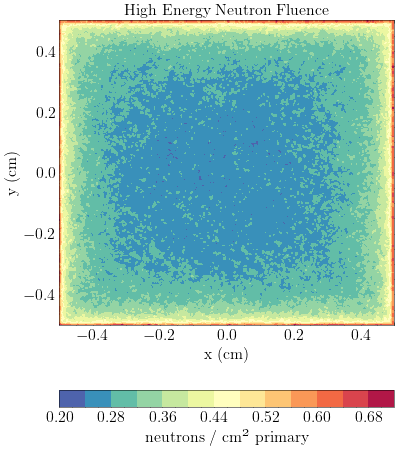

In [5]:
plt.figure(figsize=(6,8))
ct = plt.tricontourf(df.x, df.y, df.val, cmap = 'Spectral_r', levels=12)
cbar = plt.colorbar(ct, label = 'neutrons / cm² primary', orientation = 'horizontal')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('High Energy Neutron Fluence')
plt.savefig('High_Energy_Neutrons.svg', dpi=300,bbox_inches = "tight")

      left  right       val         u         σ
0   -0.500 -0.496  0.608632  0.172880  0.001052
1   -0.496 -0.492  0.493174  0.192565  0.000950
2   -0.492 -0.488  0.453181  0.199682  0.000905
3   -0.488 -0.484  0.428810  0.205297  0.000880
4   -0.484 -0.480  0.412596  0.209681  0.000865
..     ...    ...       ...       ...       ...
246  0.484  0.488  0.429520  0.205505  0.000883
247  0.488  0.492  0.454902  0.199988  0.000910
248  0.492  0.496  0.493221  0.191923  0.000947
249  0.496  0.500  0.600712  0.173735  0.001044
250  0.500  0.500  0.600712  0.173735  0.001044

[251 rows x 5 columns]


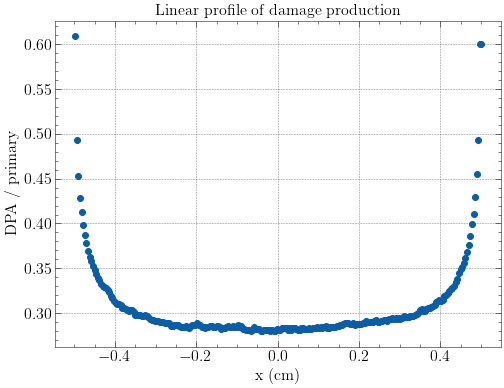

In [45]:
data = np.loadtxt('/home/mbergamo/Sim/Natal2/sim_23_plot01.dat')
df = pd.DataFrame(data)
df.columns = ['left', 'right', 'val', 'u']
df.insert(4, 'σ', df.val*df.u*0.01)
print(df)
plt.errorbar((df.left + df.right)/2, df.val, yerr = df.σ, fmt='o', ecolor = 'black', capsize = 2)
plt.xlabel('x (cm)')
plt.ylabel('DPA / primary')
plt.title('Linear profile of damage production')
#plt.savefig('Linear.svg', dpi=300,bbox_inches = "tight")

# High Energy DPA

In [13]:
data = np.loadtxt('/home/mbergamo/Sim/Natal2/sim_24_plot.dat')
df = pd.DataFrame(data)
df.columns = ['x', 'y', 'val', 'u']
df

,x,y,val,u
0,-0.5,-0.500,1.445500e-24,52.0863
1,-0.5,-0.496,3.875610e-22,99.8824
2,-0.5,-0.492,1.501100e-21,99.9672
3,-0.5,-0.488,4.545300e-24,63.8212
4,-0.5,-0.484,6.865860e-25,24.9080
...,...,...,...,...
62996,0.5,0.484,3.420260e-23,98.3129
62997,0.5,0.488,4.943040e-25,31.5822
62998,0.5,0.492,2.908760e-24,62.2482
62999,0.5,0.496,9.117420e-25,36.5065


Text(0.5, 1.0, 'Damage production of High Energy Neutrons')

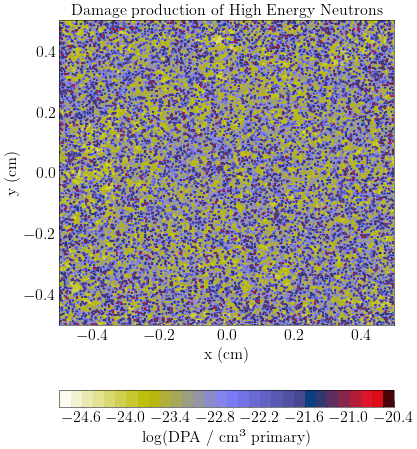

In [14]:
plt.figure(figsize=(6,8))
ct = plt.tricontourf(df.x, df.y, np.log10(df.val), cmap = 'gist_stern_r', levels=30)
cbar = plt.colorbar(ct, label = 'log(DPA / cm³ primary)', orientation = 'horizontal')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Damage production of High Energy Neutrons')
#plt.savefig('High_Energy_DPA.svg', dpi=300,bbox_inches = "tight")

     left  right           val        u             σ
0   -5.00  -4.96  3.552060e-24  3.09914  1.100833e-25
1   -4.96  -4.92  3.654560e-24  3.05717  1.117261e-25
2   -4.92  -4.88  3.683380e-24  3.00100  1.105382e-25
3   -4.88  -4.84  3.546480e-24  3.10748  1.102062e-25
4   -4.84  -4.80  3.404780e-24  3.14455  1.070650e-25
..    ...    ...           ...      ...           ...
246  4.84   4.88  3.697970e-24  3.04476  1.125943e-25
247  4.88   4.92  3.634450e-24  3.01981  1.097535e-25
248  4.92   4.96  3.684310e-24  3.04033  1.120152e-25
249  4.96   5.00  3.860330e-24  3.01048  1.162145e-25
250  5.00   5.00  3.860330e-24  3.01048  1.162145e-25

[251 rows x 5 columns]


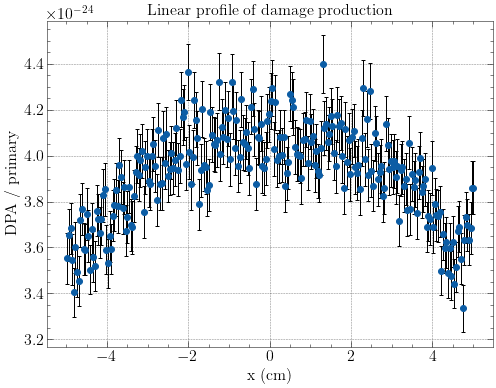

In [25]:
data = np.loadtxt('/home/mbergamo/Sim/Natal2/sim_24_plot01.dat')
df = pd.DataFrame(data)
df.columns = ['left', 'right', 'val', 'u']
df.insert(4, 'σ', df.val*df.u*0.01)
print(df)
plt.errorbar((df.left + df.right)/2, df.val, yerr = df.σ, fmt='o', ecolor = 'black', capsize = 2)
plt.xlabel('x (cm)')
plt.ylabel('DPA / primary')
plt.title('Linear profile of damage production')
plt.savefig('Linear.svg', dpi=300,bbox_inches = "tight") 

# Evaporation Neutron Fluence

         x      y       val        u
0     -0.5 -0.500  0.682021  2.65277
1     -0.5 -0.496  0.623964  2.67724
2     -0.5 -0.492  0.606625  2.79111
3     -0.5 -0.488  0.580502  2.81520
4     -0.5 -0.484  0.564143  2.96030
...    ...    ...       ...      ...
62996  0.5  0.484  0.615112  2.67580
62997  0.5  0.488  0.585525  2.73054
62998  0.5  0.492  0.620276  2.74684
62999  0.5  0.496  0.624901  2.66774
63000  0.5  0.500  0.624901  2.66774

[63001 rows x 4 columns]


Text(0.5, 1.0, 'High Energy Neutron Fluence')

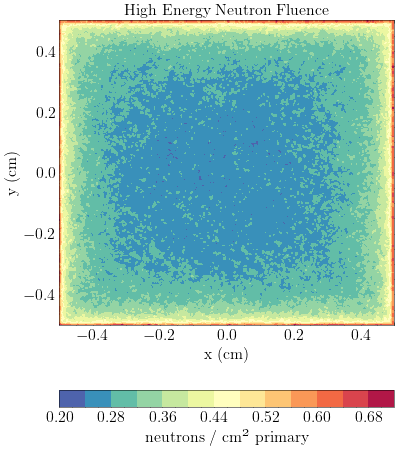

In [23]:
data = np.loadtxt('/home/mbergamo/Sim/Natal2/sim_23_plot.dat')
df = pd.DataFrame(data)
df.columns = ['x', 'y', 'val', 'u']
print(df)
plt.figure(figsize=(6,8))
ct = plt.tricontourf(df.x, df.y, df.val, cmap = 'Spectral_r', levels=12)
cbar = plt.colorbar(ct, label = 'neutrons / cm² primary', orientation = 'horizontal')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('High Energy Neutron Fluence')
#plt.savefig('High_Energy_Neutrons.svg', dpi=300,bbox_inches = "tight")

      left  right       val         u         σ
0   -0.500 -0.496  0.608632  0.172880  0.001052
1   -0.496 -0.492  0.493174  0.192565  0.000950
2   -0.492 -0.488  0.453181  0.199682  0.000905
3   -0.488 -0.484  0.428810  0.205297  0.000880
4   -0.484 -0.480  0.412596  0.209681  0.000865
..     ...    ...       ...       ...       ...
246  0.484  0.488  0.429520  0.205505  0.000883
247  0.488  0.492  0.454902  0.199988  0.000910
248  0.492  0.496  0.493221  0.191923  0.000947
249  0.496  0.500  0.600712  0.173735  0.001044
250  0.500  0.500  0.600712  0.173735  0.001044

[251 rows x 5 columns]


Text(0.5, 1.0, 'Linear profile of damage production')

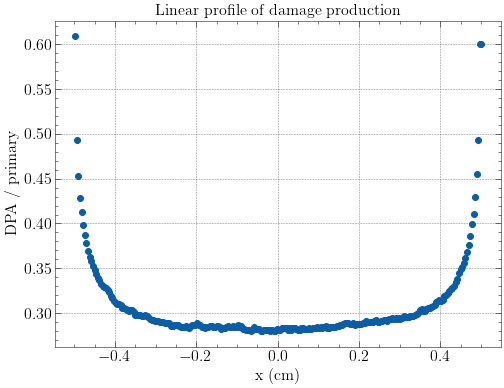

In [47]:
data = np.loadtxt('/home/mbergamo/Sim/Natal3/sim_23_plot01.dat')
df = pd.DataFrame(data)
df.columns = ['left', 'right', 'val', 'u']
df.insert(4, 'σ', df.val*df.u*0.01)
print(df)
plt.errorbar((df.left + df.right)/2, df.val, yerr = df.σ, fmt='o', ecolor = 'black', capsize = 2)
plt.xlabel('x (cm)')
plt.ylabel('DPA / primary')
plt.title('Linear profile of damage production')
#plt.savefig('Linear.svg', dpi=300,bbox_inches = "tight")

In [21]:
data = np.loadtxt('/home/mbergamo/Sim/Natal5/sim_24_plot.dat')
df = pd.DataFrame(data)
df.columns = ['x', 'y', 'val', 'u']
print(df)
for i in range(df.val.size):
    if df.val[i] == 0:
        df.val[i] = 1e-30
        df.u[i] = 1e-30
        
print(df)

         x      y           val         u
0     -0.5 -0.500  2.429060e-26   99.9522
1     -0.5 -0.496  0.000000e+00    0.0000
2     -0.5 -0.492  2.142860e-26  100.0000
3     -0.5 -0.488  1.670130e-26  100.0000
4     -0.5 -0.484  0.000000e+00    0.0000
...    ...    ...           ...       ...
62996  0.5  0.484  8.698110e-30   70.7107
62997  0.5  0.488  2.044910e-26  100.0000
62998  0.5  0.492  9.063270e-26   64.3698
62999  0.5  0.496  1.421210e-29   57.8781
63000  0.5  0.500  1.421210e-29   57.8781

[63001 rows x 4 columns]
         x      y           val             u
0     -0.5 -0.500  2.429060e-26  9.995220e+01
1     -0.5 -0.496  1.000000e-30  1.000000e-30
2     -0.5 -0.492  2.142860e-26  1.000000e+02
3     -0.5 -0.488  1.670130e-26  1.000000e+02
4     -0.5 -0.484  1.000000e-30  1.000000e-30
...    ...    ...           ...           ...
62996  0.5  0.484  8.698110e-30  7.071070e+01
62997  0.5  0.488  2.044910e-26  1.000000e+02
62998  0.5  0.492  9.063270e-26  6.436980e+01
62999  0.5

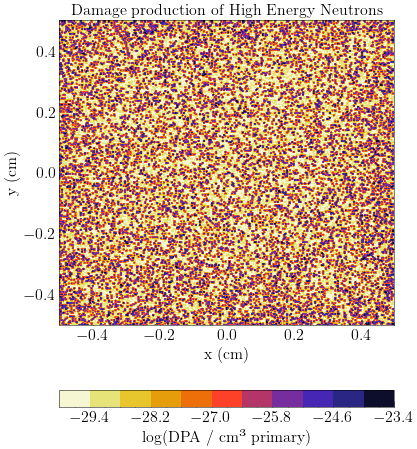

In [22]:
plt.figure(figsize=(6,8))
ct = plt.tricontourf(df.x, df.y, np.log10(df.val), cmap = 'CMRmap_r', levels=10)
cbar = plt.colorbar(ct, label = 'log(DPA / cm³ primary)', orientation = 'horizontal')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Damage production of High Energy Neutrons')
plt.savefig('High_Energy_DPA.png', dpi=300,bbox_inches = "tight")

,Emin,Emax,Fluence
0,1.000000E-09,1.072267E-09,1.743479E+02
1,1.072267E-09,1.149757E-09,1.853110E+02
2,1.149757E-09,1.232847E-09,1.969747E+02
3,1.232847E-09,1.321941E-09,2.093789E+02
4,1.321941E-09,1.417474E-09,2.225648E+02
...,...,...,...
94,7.054802E-07,7.564633E-07,9.009375E+00
95,7.564633E-07,8.111308E-07,8.495148E+00
96,8.111308E-07,8.697490E-07,8.005230E+00
97,8.697490E-07,9.326033E-07,7.539108E+00


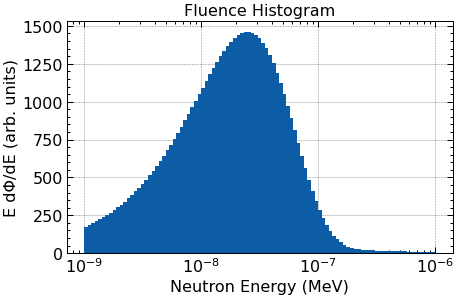

In [1]:
import FlukaSpectrum as fluka
fluka.Spectrum(-9, -6, 100, '/home/mbergamo/Sim/Natal5/spec.dat')